
# Project: Investigate The Movie Database (TMDB)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This movie database contains information about approximately 10,000 movies including genres, ratings, revenue, budget, Cast, and more. It contains movies which are released between1960 and 2015, it also has two columns for budget and revenue in terms of 2010 dollars accounting for inflation over time which will be used in any comparisons in the analysis instead of unadjusted ones. 


> In this Investigation two important questions will be answered
1. what are the factors related to the top 50 highest revenue movies ?
2. how did the movie industry evolve through years ? 

## Limitations 

1. A lot of movies in these data set have No budget or revenue which will negatively influence any financial analysis.
2. There was no mention of awards for each movie to see the greatest movies in the critics' point of view.
3. There was no mention of language or country of each movie that will help in the analysis.
4. There was no mention of Writers or screenplay writers of each movie.
5. The data set has NaN Values in a lot of columns Like Cast, director and genres which will decrease our data set

In [1]:
## importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
#loading the data set 
movies_df = pd.read_csv('tmdb-movies.csv')
movies_df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


**General info**

In [3]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

>Note: We have 21 columns in our data set but we will not use all of them in our analysis
The Columns we will use are : popularity, original_title, Cast,runtime, genres, release_year, vote_average, budget_adj and revenue_adj 


**Null Values**

In [4]:
movies_df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

>We only care about genres and Cast in our analysis so let's see the rows which have null values in these columns

In [5]:
movies_df[movies_df.cast.isnull()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
371,345637,tt4661600,0.422901,0,0,Sanjay's Super Team,NaN,NaN,Sanjay Patel,NaN,...,Sanjay's Super Team follows the daydream of a ...,7,Animation,Pixar Animation Studios,11/25/15,47,6.9,2015,0.000000,0.0
441,355020,tt4908644,0.220751,0,0,Winter on Fire: Ukraine's Fight for Freedom,NaN,http://www.netflix.com/title/80031666,Evgeny Afineevsky,The Next Generation Of Revolution,...,A documentary on the unrest in Ukraine during ...,98,Documentary,Passion Pictures|Campbell Grobman Films|Afinee...,10/9/15,37,8.2,2015,0.000000,0.0
465,321109,tt4393514,0.201696,0,0,Bitter Lake,NaN,NaN,Adam Curtis,NaN,...,An experimental documentary that explores Saud...,135,Documentary,BBC,1/24/15,19,7.8,2015,0.000000,0.0
536,333350,tt3762974,0.122543,0,0,A Faster Horse,NaN,NaN,David Gelb,NaN,...,David Gelb (Jiro Dreams of Sushi) tackles anot...,90,Documentary,NaN,10/8/15,12,8.0,2015,0.000000,0.0
538,224972,tt3983674,0.114264,0,0,The Mask You Live In,NaN,http://themaskyoulivein.org,Jennifer Siebel Newsom,"Is american masculinity harming our boys, men ...",...,"Compared to girls, research shows that boys in...",88,Documentary,NaN,1/1/15,11,8.9,2015,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9677,13926,tt0093832,0.253376,0,0,Red's Dream,NaN,NaN,John Lasseter,NaN,...,Life as the sole sale item in the clearance co...,4,Animation,Pixar Animation Studios,8/17/87,44,6.6,1987,0.000000,0.0
9755,48714,tt0061402,0.046272,0,0,The Big Shave,NaN,NaN,Martin Scorsese,NaN,...,This short film is a metaphor for the Vietnam ...,6,Drama,NaN,1/1/68,12,6.7,1968,0.000000,0.0
10434,48784,tt0060984,0.146906,200,0,Six Men Getting Sick,NaN,NaN,David Lynch,NaN,...,Lynch's first film project consists of a loop ...,4,Animation,Pensylvania Academy of Fine Arts,1/1/67,16,5.2,1967,1307.352748,0.0
10550,13925,tt0091455,0.306425,0,0,Luxo Jr.,NaN,http://www.pixar.com/short_films/Theatrical-Sh...,John Lasseter,NaN,...,A baby lamp finds a ball to play with and it's...,2,Animation|Family,Pixar Animation Studios,8/17/86,81,7.3,1986,0.000000,0.0


> There are 76 movies in this dataset that doesn't have any Cast and we can replace the Nan values with 'unknown' instead of deleting these entries

In [6]:
movies_df[movies_df.genres.isnull()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
424,363869,tt4835298,0.244648,0,0,Belli di papÃ,Diego Abatantuono|Matilde Gioli|Andrea Pisani|...,NaN,Guido Chiesa,NaN,...,"Italian remake of the Mexican 2013 hit, ""We th...",100,NaN,NaN,10/29/15,21,6.1,2015,0.00000,0.0
620,361043,tt5022680,0.129696,0,0,All Hallows' Eve 2,NaN,NaN,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,NaN,...,A woman finds a VHS tape on her doorstep that ...,90,NaN,Ruthless Pictures|Hollywood Shorts,10/6/15,13,5.0,2015,0.00000,0.0
997,287663,NaN,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,NaN,Steward Lee|Steven G. Lee,NaN,...,"A Long Time Ago In A Galaxy Far, Far Awayâ€¦ A...",44,NaN,NaN,10/3/14,13,6.8,2014,0.00000,0.0
1712,21634,tt1073510,0.302095,0,0,Prayers for Bobby,Ryan Kelley|Sigourney Weaver|Henry Czerny|Dan ...,http://www.prayersforbobby.com/,Russell Mulcahy,"Before you echo ""amen"" in your home and place ...",...,"True story of Mary Griffith, gay rights crusad...",88,NaN,Daniel Sladek Entertainment,2/27/09,57,7.4,2009,0.00000,0.0
1897,40534,tt1229827,0.020701,0,0,Jonas Brothers: The Concert Experience,Nick Jonas|Joe Jonas|Kevin Jonas|John Lloyd Ta...,NaN,Bruce Hendricks,NaN,...,Secure your VIP pass to a once-in-a-lifetime e...,76,NaN,NaN,2/27/09,11,7.0,2009,0.00000,0.0
2370,127717,tt1525359,0.081892,0,0,Freshman Father,Britt Irvin|Merrilyn Gann|Barbara Tyson|Anthon...,NaN,Michael Scott,NaN,...,NaN,0,NaN,NaN,6/5/10,12,5.8,2010,0.00000,0.0
2376,315620,tt1672218,0.068411,0,0,Doctor Who: A Christmas Carol,Matt Smith|Karen Gillan|Arthur Darvill|Michael...,NaN,NaN,NaN,...,Amy Pond and Rory Williams are trapped on a cr...,62,NaN,NaN,12/25/10,11,7.7,2010,0.00000,0.0
2853,57892,tt0270053,0.130018,0,0,Vizontele,YÄ±lmaz ErdoÄŸan|Demet Akbag|Altan Erkekli|Cem...,NaN,YÄ±lmaz ErdoÄŸan,NaN,...,The story takes place in a small town (called ...,110,NaN,NaN,2/2/01,12,7.2,2001,0.00000,0.0
3279,54330,tt1720044,0.145331,0,0,ì•„ê¸°ì™€ ë‚˜,Jang Keun-suk|Song Ha-yoon|Kim Jeong-Nan,NaN,Kim Jin-Yeong,NaN,...,Joon-soo (Jang Geun -Seok) is a rebellious hig...,96,NaN,NaN,8/13/08,11,6.1,2008,0.00000,0.0
4547,123024,tt2305700,0.520520,0,0,London 2012 Olympic Opening Ceremony: Isles of...,Queen Elizabeth II|Mike Oldfield|Kenneth Brana...,http://www.london2012.com/,Danny Boyle,Inspire a generation.,...,The London 2012 Olympic Games Opening Ceremony...,220,NaN,BBC,7/27/12,12,8.3,2012,0.00000,0.0


> There are 23 movies in this dataset that doesn't have any genres and we can remove these entries from the dataset as we will make a lot of operations on genres in our analysis  

**Duplicates**

In [7]:
movies_df[movies_df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


> Only one duplicated entry will be removed 

**Descriptive statistics of the data set**

In [8]:
movies_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> Most of the dataset entries have 0 at budget _adj and revenue_adj then we will not remove but will query the dataset in our analysis on some conditions on the revenue_adj and budget_adj in the second question we will answer 

**Exploring important columns**

In [9]:
movies_df.genres.value_counts()

Comedy                                       712
Drama                                        712
Documentary                                  312
Drama|Romance                                289
Comedy|Drama                                 280
                                            ... 
Drama|Horror|Comedy                            1
Drama|Comedy|War|Crime|Thriller                1
Adventure|Fantasy|Romance|Science Fiction      1
Thriller|Crime|Drama|Horror                    1
Action|Comedy|Animation                        1
Name: genres, Length: 2039, dtype: int64

In [10]:
movies_df.cast.value_counts()

Louis C.K.                                                                    6
William Shatner|Leonard Nimoy|DeForest Kelley|James Doohan|George Takei       5
Bill Burr                                                                     4
George Carlin                                                                 3
Aziz Ansari                                                                   3
                                                                             ..
Clint Eastwood|Jeff Fahey|Charlotte Cornwell|George Dzundza|Alun Armstrong    1
Huang Bo|Xu Zheng|Zhou Dong-Yu|Yuan Quan                                      1
John Lurie|Eszter Balint|Richard Edson|Cecillia Stark|Danny Rosen             1
Mia Farrow|Dianne Wiest|Sam Waterston|Elaine Stritch|Jack Warden              1
Harrison Ford|Cate Blanchett|Shia LaBeouf|Ray Winstone|Karen Allen            1
Name: cast, Length: 10719, dtype: int64

>A lot of entries in genres and cast columns contain multiple values separated by pipe (|) characters and should be split



### Data Cleaning 

In [11]:
movies_df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

**drop the unused columns**

In [12]:

unused = ['id', 'imdb_id','budget', 'revenue','homepage', 'director', 'tagline', 'keywords', 'overview',\
         'production_companies','vote_count', 'release_date']

In [13]:
movies_df.drop(columns= unused, inplace =True)
movies_df.head()

,popularity,original_title,cast,runtime,genres,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,7.3,2015,1.747999e+08,1.385749e+09


**Removing duplicates**

In [14]:
movies_df.drop_duplicates(inplace =True)
movies_df.duplicated().sum()

0

**Removing and Replacing Null Values**

In [15]:
movies_df.dropna(inplace = True, subset=['genres']) #remove entries with Null values at genres
movies_df.genres.isnull().sum()

0

In [16]:
movies_df.cast.fillna('Unknown',inplace = True) #replace entries with Null values at cast with unknown
movies_df.cast.isnull().sum()

0

**Making a dataframe for cast and genres for the Exploratory data analysis phase**

In [17]:
movies_df.reset_index(inplace= True,drop =True)

genres_data = movies_df.genres.str.split('|').to_list() # splitting the genres and making a list for each entry

# making a dataframe with genre and important columns
genres_df =pd.DataFrame(data = genres_data,index=[movies_df.release_year,movies_df.original_title,movies_df.revenue_adj]).stack() 
genres_df=genres_df.reset_index([0,1,2,3])
genres_df.drop(columns= 'level_3',inplace = True)
genres_df.rename({0:'genres'},axis = 1,inplace = True)
genres_df.head()

,release_year,original_title,revenue_adj,genres
0,2015,Jurassic World,1.392446e+09,Action
1,2015,Jurassic World,1.392446e+09,Adventure
2,2015,Jurassic World,1.392446e+09,Science Fiction
3,2015,Jurassic World,1.392446e+09,Thriller
4,2015,Mad Max: Fury Road,3.481613e+08,Action


In [18]:
movies_df.reset_index(inplace= True,drop =True)

cast_data = movies_df.cast.str.split('|').to_list() # splitting the cast and making a list for each entry

# making a dataframe with cast and important columns
cast_df =pd.DataFrame(data = cast_data,index=[movies_df.release_year,movies_df.original_title,movies_df.revenue_adj]).stack() 
cast_df=cast_df.reset_index([0,1,2,3])
cast_df.drop(columns= 'level_3',inplace = True)
cast_df.rename({0:'cast'},axis = 1,inplace = True)
cast_df.head()

,release_year,original_title,revenue_adj,cast
0,2015,Jurassic World,1.392446e+09,Chris Pratt
1,2015,Jurassic World,1.392446e+09,Bryce Dallas Howard
2,2015,Jurassic World,1.392446e+09,Irrfan Khan
3,2015,Jurassic World,1.392446e+09,Vincent D'Onofrio
4,2015,Jurassic World,1.392446e+09,Nick Robinson


In [19]:
movies_df.shape

(10842, 9)

In [20]:
cast_df.shape

(52549, 4)

In [21]:
genres_df.shape

(26955, 4)

> - The new data set has 10842 rows and 10 columns 
- The cast data set has 52549 rows and 4 columns 
- The genres data set has 26955 rows and 4 columns

<a id='eda'></a>
## Exploratory Data Analysis


### what are the factors related to the top 100 highest revenue movies ?

We will explore the top 100 highest revenue movies as they are the most successful movies.
we will create the visualization to find insights about the factors relared to these movies and relationships between variables and revenue.

**Add Decade Column to the data frame**

In [22]:
movies_df['decade']= np.floor(movies_df.release_year / 10) * 10 
movies_df['decade'] = movies_df['decade'].astype('int64') ;

In [23]:
top_100_df = movies_df.sort_values(by = "revenue_adj",ascending = False)[0:99]
top_100_df.head()

,popularity,original_title,cast,runtime,genres,vote_average,release_year,budget_adj,revenue_adj,decade
1383,9.432768,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,162,Action|Adventure|Fantasy|Science Fiction,7.1,2009,2.408869e+08,2.827124e+09,2000
1326,12.037933,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,121,Adventure|Action|Science Fiction,7.9,1977,3.957559e+07,2.789712e+09,1970
5217,4.355219,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,194,Drama|Romance|Thriller,7.3,1997,2.716921e+08,2.506406e+09,1990
10571,2.010733,The Exorcist,Linda Blair|Max von Sydow|Ellen Burstyn|Jason ...,122,Drama|Horror|Thriller,7.2,1973,3.928928e+07,2.167325e+09,1970
9783,2.563191,Jaws,Roy Scheider|Robert Shaw|Richard Dreyfuss|Lorr...,124,Horror|Thriller|Adventure,7.3,1975,2.836275e+07,1.907006e+09,1970


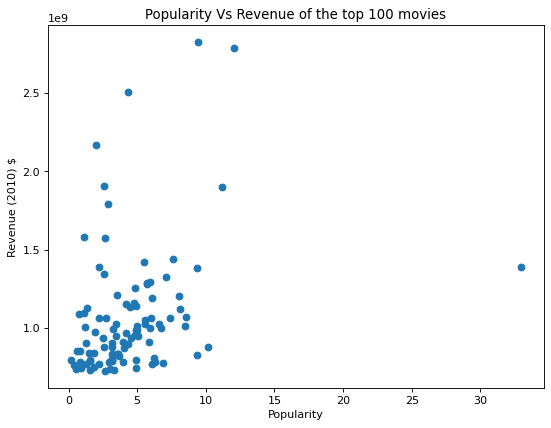

In [24]:
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.scatter(top_100_df.popularity,top_100_df.revenue_adj)
plt.title("Popularity Vs Revenue of the top 100 movies")
plt.xlabel("Popularity")
plt.ylabel("Revenue (2010) $");

> As shown in the above figure, The popularity and the revenue have a linear relation between them as the revenue increases when the popularity increases

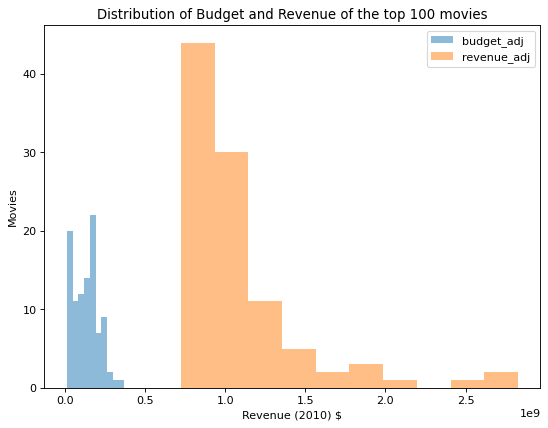

In [25]:
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.hist(top_100_df.budget_adj, alpha=0.5, label='budget_adj')
plt.hist(top_100_df.revenue_adj, alpha=0.5, label='revenue_adj');
plt.legend(loc='upper right')
plt.title("Distribution of Budget and Revenue of the top 100 movies")
plt.xlabel("Revenue (2010) $") ;
plt.ylabel("Movies") ;

>As shown in the figure above, All of the top 100 highest revenue movies have made high profit as the highest budget movie have a budget lower than the lowest revenue movie in these movies.

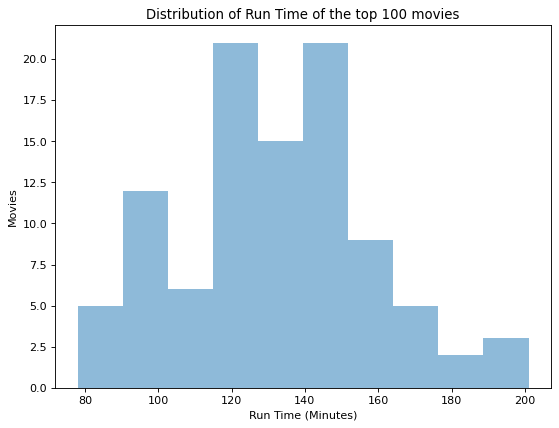

In [26]:
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.hist(top_100_df.runtime,alpha=0.5);
plt.title("Distribution of Run Time of the top 100 movies")
plt.xlabel("Run Time (Minutes)");
plt.ylabel("Movies") ;

>As shown in the figure above, Most of the top 100 movies have a run time from 120 minutes and 150 minutes.

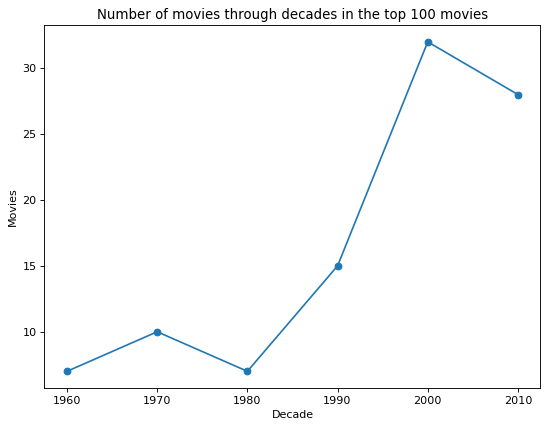

In [27]:
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.plot((top_100_df.groupby(['decade'])['original_title'].count()),'-o');
plt.title("Number of movies through decades in the top 100 movies")
plt.xlabel("Decade");
plt.ylabel("Movies");

>As shown in the figure above, The number of movies have increased through decades except for the 1980s and there were 25 movies in the years from 2010 to 2015 and it is expected that 2010s to have more of the highest revenue movie than 2000s.

In [28]:
top_100_df = pd.Series(genres_df['revenue_adj'].unique()).sort_values(ascending = False)[0:99]
top_100_genres = genres_df [genres_df['revenue_adj'].isin(top_100_df)] 

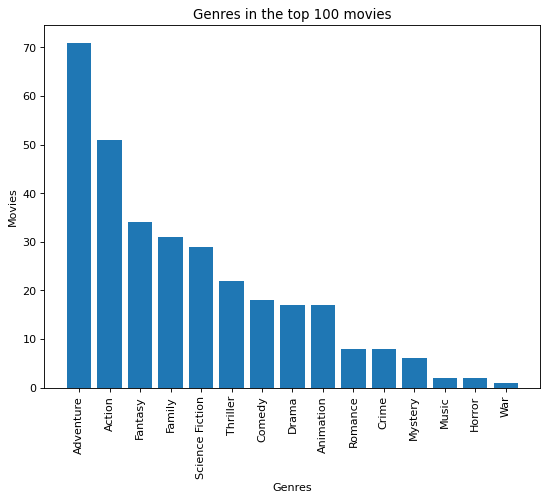

In [29]:
plt.figure(num=None, figsize=(8, 6), dpi=80)
genre_count = top_100_genres.groupby(["genres"])["original_title"].count().sort_values(ascending = False)
plt.bar(genre_count.index,genre_count.values)
plt.title("Genres in the top 100 movies")
plt.xlabel("Genres")
plt.ylabel("Movies")
plt.xticks(rotation = 90);

>As showm in the figure above,
1. The most common genre in the top 100 movies is Adventure as over 70% of these movies have adventures. 
2. The second most common genre is Action as over 50% of these movies have action scenes 

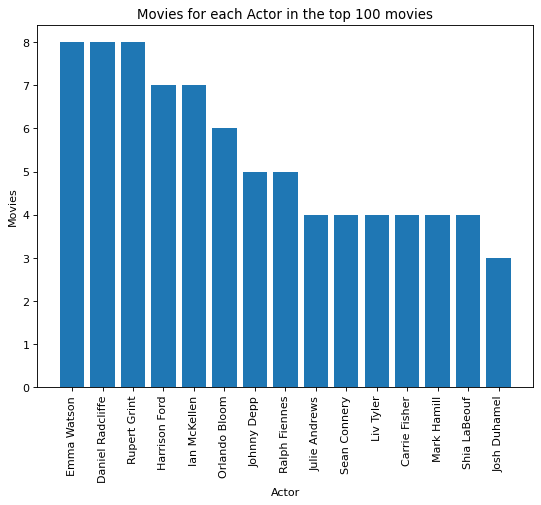

In [30]:
plt.figure(num=None, figsize=(8, 6), dpi=80)
top_100_rev = pd.Series(cast_df['revenue_adj'].unique()).sort_values(ascending = False)[0:99]
top_100_cast = cast_df [cast_df['revenue_adj'].isin(top_100_rev)] 
cast_count = top_100_cast.groupby(["cast"])["original_title"].count().sort_values(ascending = False)[0:15]
plt.bar(cast_count.index,cast_count.values)
plt.title("Movies for each Actor in the top 100 movies")
plt.xlabel("Actor");
plt.ylabel("Movies");
plt.xticks(rotation = 90);

In [31]:
top_100_cast[(top_100_cast["cast"] == "Emma Watson")]

,release_year,original_title,revenue_adj,cast
6578,2009,Harry Potter and the Half-Blood Prince,9.492765e+08,Emma Watson
9140,2010,Harry Potter and the Deathly Hallows: Part 1,9.543059e+08,Emma Watson
12515,2001,Harry Potter and the Philosopher's Stone,1.202518e+09,Emma Watson
16078,2011,Harry Potter and the Deathly Hallows: Part 2,1.287184e+09,Emma Watson
18629,2002,Harry Potter and the Chamber of Secrets,1.062776e+09,Emma Watson
29600,2005,Harry Potter and the Goblet of Fire,1.000353e+09,Emma Watson
33349,2004,Harry Potter and the Prisoner of Azkaban,9.117862e+08,Emma Watson
35448,2007,Harry Potter and the Order of the Phoenix,9.866889e+08,Emma Watson


In [32]:
top_100_cast[(top_100_cast["cast"] == "Harrison Ford")]

,release_year,original_title,revenue_adj,cast
15,2015,Star Wars: The Force Awakens,1.902723e+09,Harrison Ford
6282,1977,Star Wars,2.789712e+09,Harrison Ford
13704,2008,Indiana Jones and the Kingdom of the Crystal S...,7.966945e+08,Harrison Ford
35052,1980,The Empire Strikes Back,1.424626e+09,Harrison Ford
38362,1983,Return of the Jedi,1.253819e+09,Harrison Ford
40271,1981,Raiders of the Lost Ark,9.351169e+08,Harrison Ford
44228,1989,Indiana Jones and the Last Crusade,8.340611e+08,Harrison Ford


In [33]:
top_100_cast[(top_100_cast["cast"] == "Ian McKellen")]

,release_year,original_title,revenue_adj,cast
2999,2014,The Hobbit: The Battle of the Five Armies,8.797523e+08,Ian McKellen
12509,2001,The Lord of the Rings: The Fellowship of the Ring,1.073080e+09,Ian McKellen
18623,2002,The Lord of the Rings: The Two Towers,1.122902e+09,Ian McKellen
20858,2012,The Hobbit: An Unexpected Journey,9.658933e+08,Ian McKellen
23601,2003,The Lord of the Rings: The Return of the King,1.326278e+09,Ian McKellen
25962,2013,The Hobbit: The Desolation of Smaug,8.970944e+08,Ian McKellen
31391,2006,The Da Vinci Code,8.201647e+08,Ian McKellen


>From The tables above, It is recognised that the successful movie series like Harry Potter, Star Wars and The Lord of the Rings dominated the top 100 highest revenue movies

### how did the movie industry evolve through years ? 

We will explore how the movie industry evolved through years in terms of a lot of factors like the number of movies, the most common genres, the run time and the popularity. 

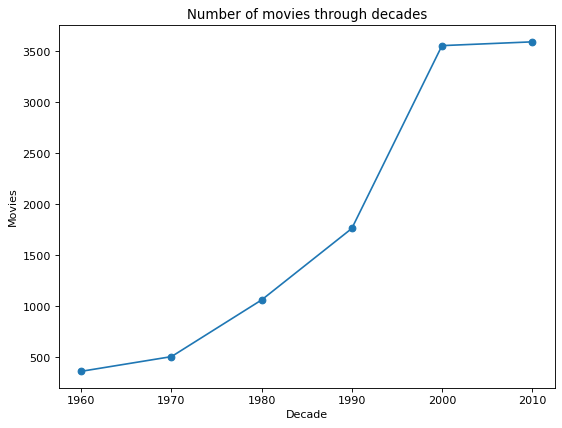

In [34]:
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.plot(movies_df.groupby(['decade' ])["original_title"].count(),'-o')
plt.title("Number of movies through decades")
plt.xlabel("Decade");
plt.ylabel("Movies");

>As shown in the figure above, The number of movies has increased through decades and it's expected to increase more in the 2010s as the movies made from 2010 to 2015 are more than the movies made in the 2010s

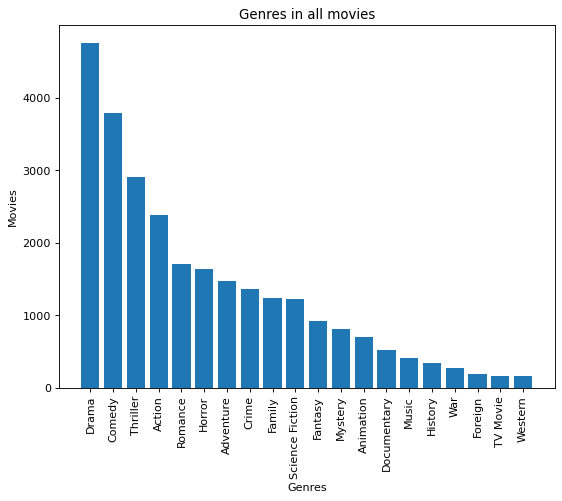

In [35]:
plt.figure(num=None, figsize=(8, 6), dpi=80)
genres_df['decade']= np.floor(genres_df.release_year / 10) * 10 #making the decade column for genres data frame
genres_df['decade'] = genres_df['decade'].astype('int64') ;
x = genres_df.groupby(['genres' ])["original_title"].count().sort_values(ascending = False)
plt.bar(x.index,x.values)
plt.title("Genres in all movies")
plt.xlabel("Genres")
plt.ylabel("Movies")
plt.xticks(rotation = 90);

> As shown in the figure above, The top 5 genres in our data set are Drama, Comedy, Thriller, Action and Romance  

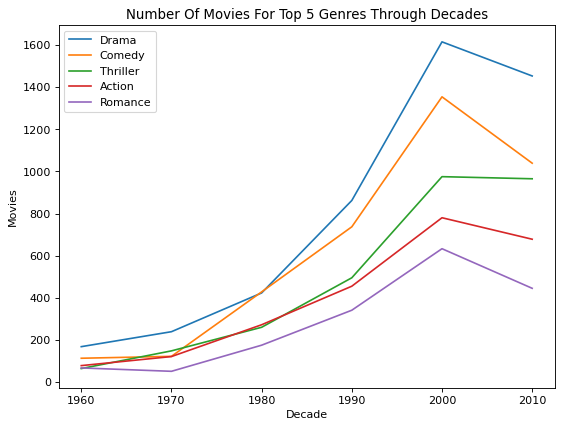

In [36]:
# plotting a line chart for the top 5 genres through years 
plt.figure(num=None, figsize=(8, 6), dpi=80)
for item in x.index[0:5] :
    item_df = genres_df[genres_df["genres"] == item]
    plt.plot(item_df.groupby(['decade' ])["original_title"].count(),label = item)
    plt.legend()
plt.title("Number Of Movies For Top 5 Genres Through Decades")
plt.xlabel("Decade")
plt.ylabel("Movies");

>As shown in the figure above, 
1. The Drama genre was always the most common genre through decades except 1980's 
2. The Comedy genre had increased rapidly from 1970's to 1980's as it was the most common genre  

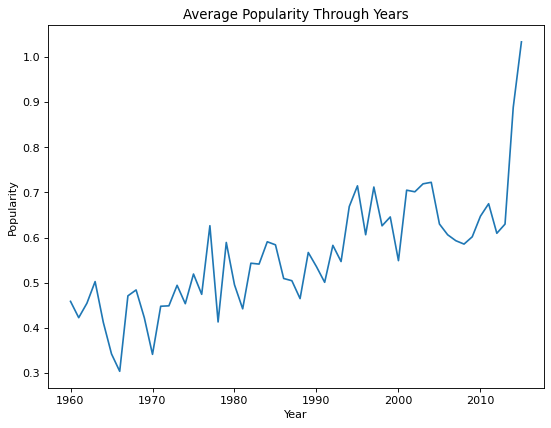

In [37]:
plt.figure(num=None, figsize=(8, 6), dpi=80)
pop_year= movies_df.groupby(['release_year'])["popularity"].mean()
plt.plot(pop_year);
plt.title("Average Popularity Through Years")
plt.xlabel("Year")
plt.ylabel("Popularity");

>As shown in the figure above, The average popularity have been increased through years and it has been increased rapidly from 2010 to 2015

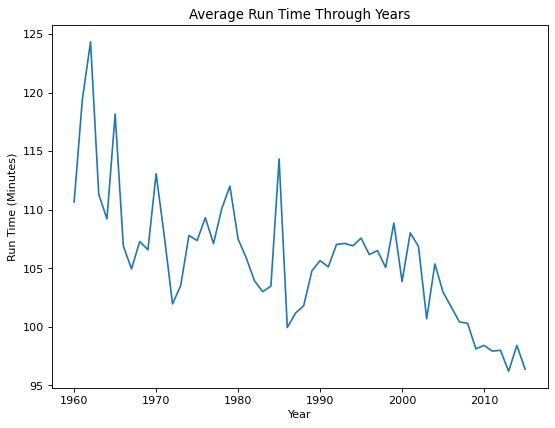

In [38]:
plt.figure(num=None, figsize=(8, 6), dpi=80)
runtime_year= movies_df.groupby(['release_year'])["runtime"].mean()
plt.plot(runtime_year);
plt.title("Average Run Time Through Years")
plt.xlabel("Year")
plt.ylabel("Run Time (Minutes)");

>As shown in the figure above, The average run time have been decreased through years from 125 minutes in the 1960s to 95 minutes in 2015

<a id='conclusions'></a>
## Conclusions

> The Factors related to the top 100 highest revenue movies are : 
1. The revenue increases when the popularity increases
2. All of these movies have made very high profit
3. Most of the top 100 movies have a run time from 120 minutes and 150 minutes.
4. Over 70% of these movies have adventures and 50% of these movies have action scenes. 
5. The successful movie series like Harry Potter, Star Wars and The Lord of the Rings dominated the list of the movies

> The movie industry evolved a lot through years as :
1. The number of movies has increased through decades and it's expected to increase more in the 2010s as the movies made from 2010 to 2015 are more than the movies made in the 2010s
2. The Drama genre was always the most common genre through decades except 1980's and The Comedy genre had increased rapidly from 1970's to 1980's as it was the most common genre
3. The average popularity have been increased through years and it has been increased rapidly from 2010 to 2015
4. The average run time have been decreased through years from 125 minutes in the 1960s to 95 minutes in 2015